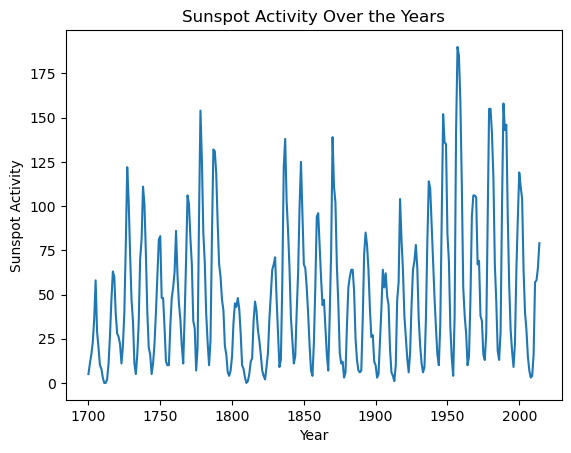

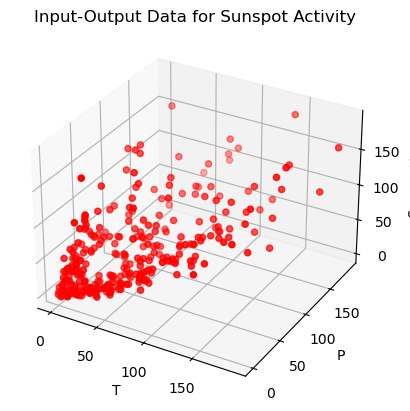

Eror vetor: [  5.50569132   1.73404859  -4.53175005 -12.53663581  39.39587613
  -7.32379222   8.71925924   2.30857307  10.96729162   8.13363885
   7.10847791   7.06244954   0.91696975  -3.54033705  -6.56609024
  -4.44207015   8.36761401  14.66465168  -2.35383891  -2.37589867
   5.93414375  12.52775108 -10.56681457  -8.12965088 -25.52494763
 -27.66421727  29.38492009   3.60872752  -0.833922    -6.40296846
  17.40433106  -3.03402497  -6.96581257  -5.35800815 -22.83188889
   5.82564515 -31.92215324  13.7310873    7.91876995   7.46872575
  -1.3937892   -4.4453034   13.87213371  -5.22243195  -0.49430868
  -6.70239077  -8.17627151 -12.35489917   2.59108553  26.76780434
 -24.48894712  15.30738855  10.04396676  -4.00146936   5.51916408
 -15.17818817   0.22153416   2.72857057  -8.12905081 -22.19165312
  29.77341443  -4.88853737  -2.44160216  10.13423891   4.58725221
 -26.9154907  -13.86622908 -21.77965036  13.75934941   2.17538933
  -6.6859333   16.28031877 -15.62214647  23.51117715 -21.1377698

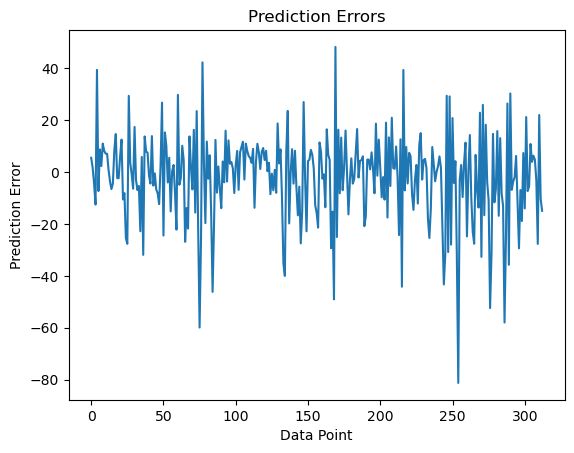

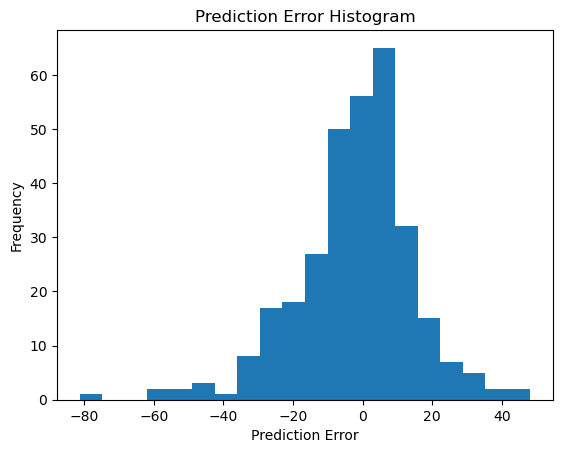

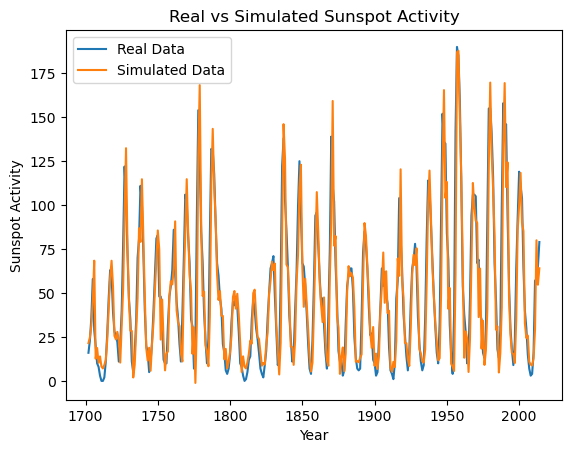

Optimal Coefficients:
w1: -0.6513238762657068
w2: 1.4272601056966459
b: 9.062449540429913


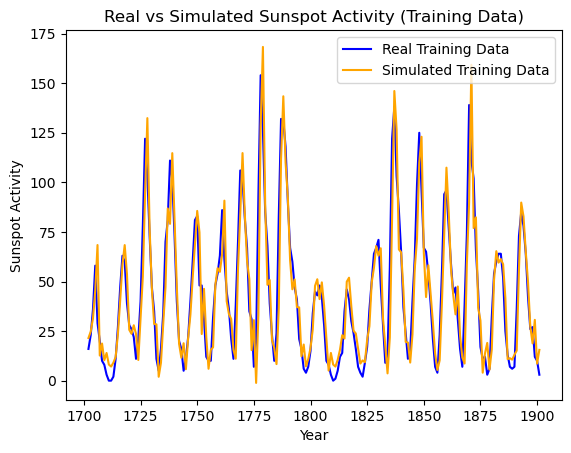

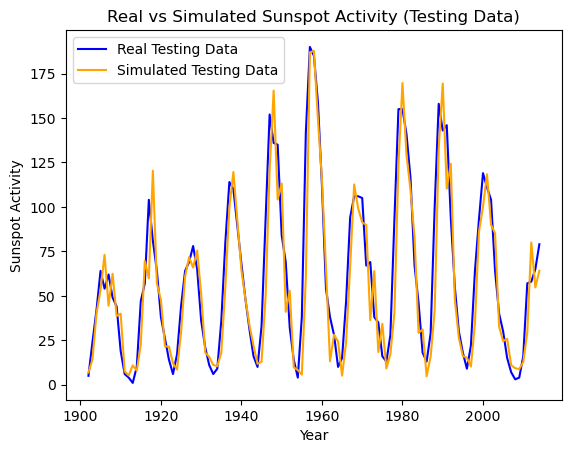

Mean Squared Error (MSE) for Training Data: 287.47097447971606
Mean Squared Error (MSE) for Testing Data: 398.08342361515747
Median Absolute Deviation (MAD) for Training Data: 8.212222829356548
Median Absolute Deviation (MAD) for Testing Data: 10.827297660701017


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define calculate_optimal_weights function
def calculate_optimal_weights(P, T):
    """
    Calculate the optimal weights for an autoregressive model using linear regression.

    Args:
    - P (numpy.ndarray): Input matrix with shape (num_samples, num_features).
    - T (numpy.ndarray): Output matrix with shape (num_samples, 1).

    Returns:
    - numpy.ndarray: Optimal weights for the autoregressive model.
    """

    # Add bias term to the input matrix
    P_with_bias = np.hstack((P, np.ones((P.shape[0], 1))))

    # Calculate optimal weights using linear regression formula
    weights = np.linalg.inv(P_with_bias.T @ P_with_bias) @ P_with_bias.T @ T

    # Extract weights excluding the bias term
    optimal_weights = weights[:-1]

    return optimal_weights


# Load data
data = np.loadtxt('sunspot.txt')

# Data Visualization
years = data[:, 0]
sunspots = data[:, 1]
plt.plot(years, sunspots)
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Sunspot Activity Over the Years')
plt.show()

# Prepare Data for Neural Network
window_size = 2
X_train = []
y_train = []
for i in range(len(sunspots) - window_size):
    X_train.append(sunspots[i:i+window_size])
    y_train.append(sunspots[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Extract the first 200 data points for training
Pu = X_train[:200]
Tu = y_train[:200]

# Calculate optimal weight coefficients for the training dataset
optimal_weights = calculate_optimal_weights(Pu, Tu)

# Build the Neural Network
class NeuralNetwork:
    def __init__(self):
        # Initialize weights and bias
        self.weights = optimal_weights
        self.bias = 0.0
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the Neural Network
network = NeuralNetwork()
learning_rate = 0.0001
epochs = 25000
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = network.forward(X_train)
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)
    
    # Backpropagation (Gradient Descent)
    grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    grad_bias = np.mean(y_pred - y_train)
    
    # Update weights and bias
    network.weights -= learning_rate * grad_weights
    network.bias -= learning_rate * grad_bias


    #print(f'Epoch {epoch}:')
   #print('Weights:', network.weights)
    #print('Bias:', network.bias)


# Visualization and Analysis
# Plot 3D graph (input-output data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.set_xlabel('T')
ax.set_ylabel('P')
ax.set_zlabel('Sunspot(t)')
plt.title('Input-Output Data for Sunspot Activity')
plt.show()

# Step 8: Verify Model with Training Data
y_train_pred = network.forward(X_train)

# Step 9: Verify Model with Testing Data
# Assuming we have some testing data X_test and y_test

# Prediction Errors
e_train = y_train_pred - y_train
print("Eror vetor:", e_train)
# Plot Prediction Errors
plt.plot(e_train)
plt.xlabel('Data Point')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.show()

# Error Histogram
plt.hist(e_train, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Histogram')
plt.show()


plt.plot(years[window_size:], y_train, label='Real Data')
plt.plot(years[window_size:], y_train_pred, label='Simulated Data')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity')
plt.legend()
plt.show()

print("Optimal Coefficients:")
print("w1:", optimal_weights[0])
print("w2:", optimal_weights[1])
print("b:", network.bias)

# Verify Model with Training Data
Tsu_train = network.forward(Pu)

# Plot Training Data Verification
plt.plot(years[window_size:200+window_size], Tu, label='Real Training Data', color='blue')
plt.plot(years[window_size:200+window_size], Tsu_train, label='Simulated Training Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Training Data)')
plt.legend()
plt.show()

# Verify Model with Testing Data
X_test = []
y_test = []
for i in range(200, len(sunspots) - window_size):
    X_test.append(sunspots[i:i+window_size])
    y_test.append(sunspots[i+window_size])

X_test = np.array(X_test)
y_test = np.array(y_test)

Tsu_test = network.forward(X_test)

# Plot Testing Data Verification
plt.plot(years[200+window_size:], y_test, label='Real Testing Data', color='blue')
plt.plot(years[200+window_size:], Tsu_test, label='Simulated Testing Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Testing Data)')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE) for Training Data
mse_train = np.mean(e_train ** 2)
print("Mean Squared Error (MSE) for Training Data:", mse_train)

# Calculate Mean Squared Error (MSE) for Testing Data
e_test = y_test - Tsu_test
mse_test = np.mean(e_test ** 2)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

# Calculate Median Absolute Deviation (MAD) for Training Data
MAD_train = np.median(np.abs(e_train))

# Calculate Median Absolute Deviation (MAD) for Testing Data
MAD_test = np.median(np.abs(e_test))

print("Median Absolute Deviation (MAD) for Training Data:", MAD_train)
print("Median Absolute Deviation (MAD) for Testing Data:", MAD_test)



#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# 14. ////////////////////////////////

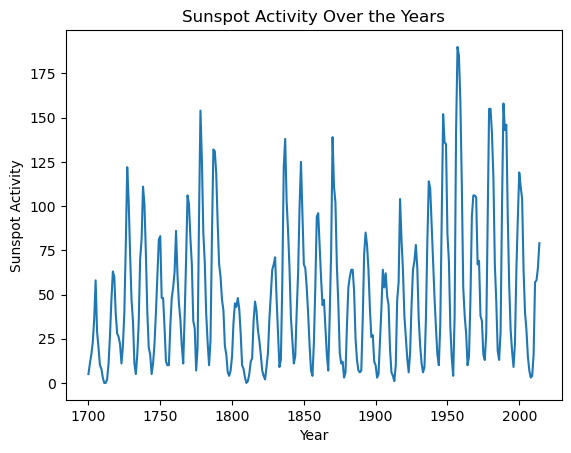

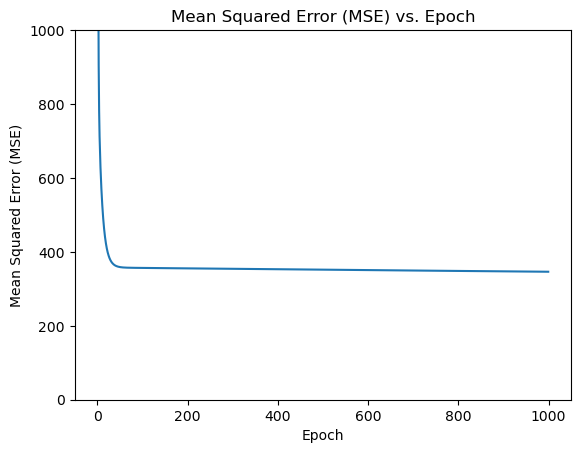

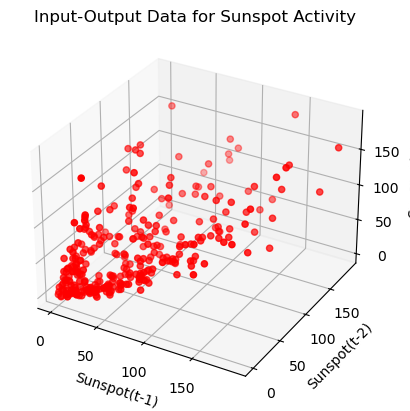

Eror vetor: [-1.66297625e+00 -4.88337475e+00 -1.05431827e+01 -1.75340866e+01
  3.61706451e+01 -1.09772192e+01  3.18633605e+00 -4.18058749e+00
  3.88713062e+00  6.97235062e-01 -7.26922917e-01 -9.19202371e-01
 -6.96118533e+00 -1.08552557e+01 -1.26142811e+01 -8.67528693e+00
  5.93737905e+00  1.28591773e+01 -5.39228108e+00 -7.00733096e+00
  6.62960673e-01  6.95207363e+00 -1.69067260e+01 -1.44883322e+01
 -3.04129055e+01 -2.96594786e+01  3.15191026e+01  6.90470614e+00
 -1.66526178e-02 -8.39366863e+00  1.35251405e+01 -8.74018170e+00
 -1.41524684e+01 -1.22679337e+01 -2.82740890e+01  3.12389438e+00
 -3.22996585e+01  1.54422884e+01  1.05749978e+01  8.18849441e+00
 -3.74672826e+00 -9.44197262e+00  7.69346361e+00 -1.21653360e+01
 -7.66297625e+00 -1.30093236e+01 -1.30154790e+01 -1.52816319e+01
  1.72607668e+00  2.70300499e+01 -2.59403953e+01  1.21496778e+01
  6.00653296e+00 -9.85087913e+00 -1.35999937e+00 -2.21548523e+01
 -5.61666495e+00 -1.20914599e+00 -1.09762711e+01 -2.42806356e+01
  2.93133987e

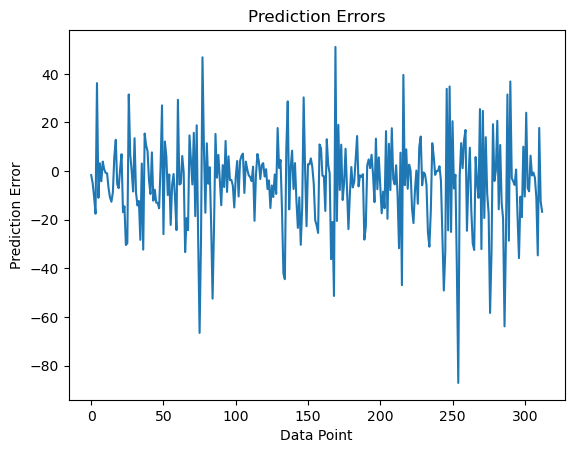

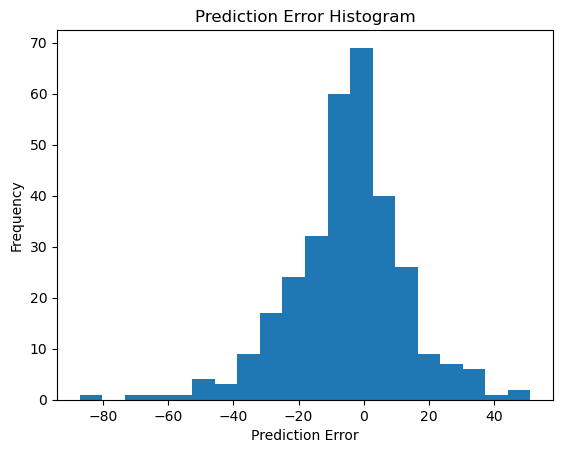

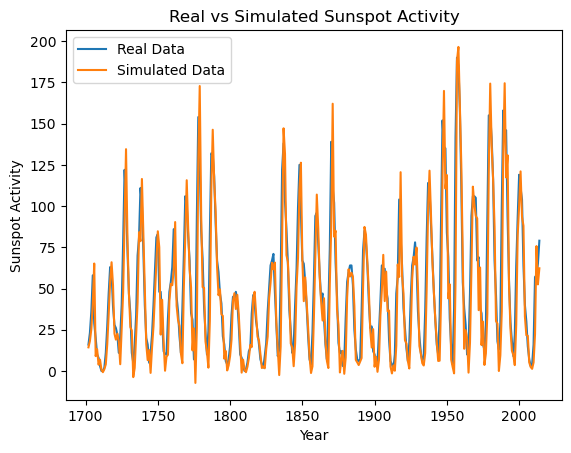

Optimal Coefficients:
w1: -0.6760819763970705
w2: 1.3715093938395844
b: 1.0807976290473336


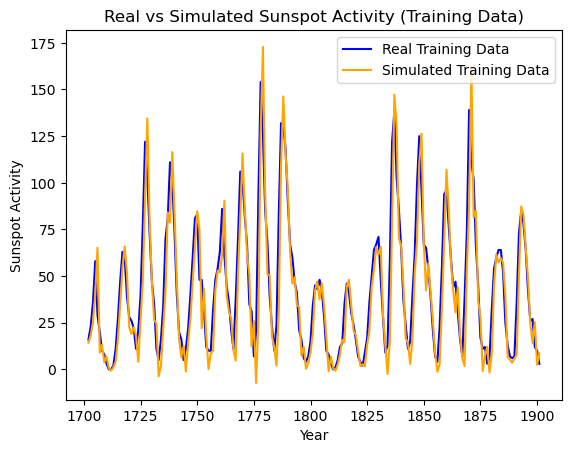

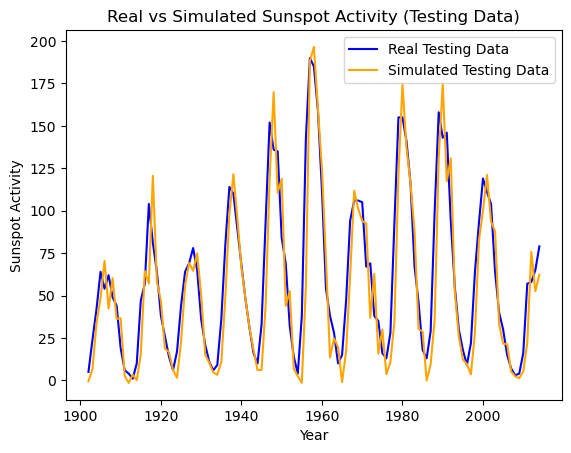

Mean Squared Error (MSE) for Training Data: 346.26604601003635
Mean Squared Error (MSE) for Testing Data: 478.0376981237887
Median Absolute Deviation (MAD) for Training Data: 9.639549564313228
Median Absolute Deviation (MAD) for Testing Data: 12.483398689725895


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define calculate_optimal_weights function
def calculate_optimal_weights(P, T):
    """
    Calculate the optimal weights for an autoregressive model using linear regression.

    Args:
    - P (numpy.ndarray): Input matrix with shape (num_samples, num_features).
    - T (numpy.ndarray): Output matrix with shape (num_samples, 1).

    Returns:
    - numpy.ndarray: Optimal weights for the autoregressive model.
    """

    # Add bias term to the input matrix
    P_with_bias = np.hstack((P, np.ones((P.shape[0], 1))))

    # Calculate optimal weights using linear regression formula
    weights = np.linalg.inv(P_with_bias.T @ P_with_bias) @ P_with_bias.T @ T

    # Extract weights excluding the bias term
    optimal_weights = weights[:-1]

    return optimal_weights


# Load data
data = np.loadtxt('sunspot.txt')

# Data Visualization
years = data[:, 0]
sunspots = data[:, 1]
plt.plot(years, sunspots)
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Sunspot Activity Over the Years')
plt.show()

# Prepare Data for Neural Network
window_size = 2
X_train = []
y_train = []
for i in range(len(sunspots) - window_size):
    X_train.append(sunspots[i:i+window_size])
    y_train.append(sunspots[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Extract the first 200 data points for training
Pu = X_train[:200]
Tu = y_train[:200]

# Calculate optimal weight coefficients for the training dataset
optimal_weights = calculate_optimal_weights(Pu, Tu)

# Build the Neural Network
class NeuralNetwork:
    def __init__(self):
        # Initialize weights and bias
        self.weights = np.random.randn(window_size) * 0.01
        self.bias = 0.0
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the Neural Network
network = NeuralNetwork()
learning_rate = 0.0002

epochs = 1000
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = network.forward(X_train)
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)
    
    # Backpropagation (Gradient Descent)
    grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    grad_bias = np.mean(y_pred - y_train)
    
    # Update weights and bias
    network.weights -= learning_rate * grad_weights
    network.bias -= learning_rate * grad_bias

# Plotting the MSE for each epoch
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Epoch')
plt.ylim(0, 1000)
plt.show()
    #print(f'Epoch {epoch}:')
   #print('Weights:', network.weights)
    #print('Bias:', network.bias)


# Visualization and Analysis
# Plot 3D graph (input-output data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.set_xlabel('Sunspot(t-1)')
ax.set_ylabel('Sunspot(t-2)')
ax.set_zlabel('Sunspot(t)')
plt.title('Input-Output Data for Sunspot Activity')
plt.show()

# Step 8: Verify Model with Training Data
y_train_pred = network.forward(X_train)

# Step 9: Verify Model with Testing Data
# Assuming we have some testing data X_test and y_test

# Prediction Errors
e_train = y_train_pred - y_train
print("Eror vetor:", e_train)
# Plot Prediction Errors
plt.plot(e_train)
plt.xlabel('Data Point')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.show()

# Error Histogram
plt.hist(e_train, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Histogram')
plt.show()


plt.plot(years[window_size:], y_train, label='Real Data')
plt.plot(years[window_size:], y_train_pred, label='Simulated Data')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity')
plt.legend()
plt.show()

print("Optimal Coefficients:")
print("w1:", optimal_weights[0])
print("w2:", optimal_weights[1])
print("b:", network.bias)

# Verify Model with Training Data
Tsu_train = network.forward(Pu)

# Plot Training Data Verification
plt.plot(years[window_size:200+window_size], Tu, label='Real Training Data', color='blue')
plt.plot(years[window_size:200+window_size], Tsu_train, label='Simulated Training Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Training Data)')
plt.legend()
plt.show()

# Verify Model with Testing Data
X_test = []
y_test = []
for i in range(200, len(sunspots) - window_size):
    X_test.append(sunspots[i:i+window_size])
    y_test.append(sunspots[i+window_size])

X_test = np.array(X_test)
y_test = np.array(y_test)

Tsu_test = network.forward(X_test)

# Plot Testing Data Verification
plt.plot(years[200+window_size:], y_test, label='Real Testing Data', color='blue')
plt.plot(years[200+window_size:], Tsu_test, label='Simulated Testing Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Testing Data)')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE) for Training Data
mse_train = np.mean(e_train ** 2)
print("Mean Squared Error (MSE) for Training Data:", mse_train)

# Calculate Mean Squared Error (MSE) for Testing Data
e_test = y_test - Tsu_test
mse_test = np.mean(e_test ** 2)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

# Calculate Median Absolute Deviation (MAD) for Training Data
MAD_train = np.median(np.abs(e_train))

# Calculate Median Absolute Deviation (MAD) for Testing Data
MAD_test = np.median(np.abs(e_test))

print("Median Absolute Deviation (MAD) for Training Data:", MAD_train)
print("Median Absolute Deviation (MAD) for Testing Data:", MAD_test)



#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# 14. ////////////////////////////////

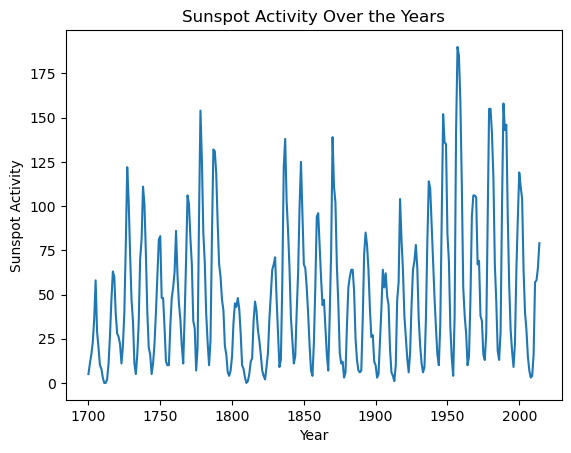

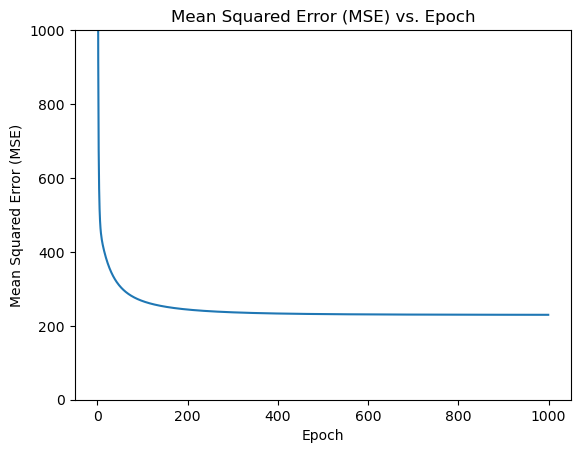

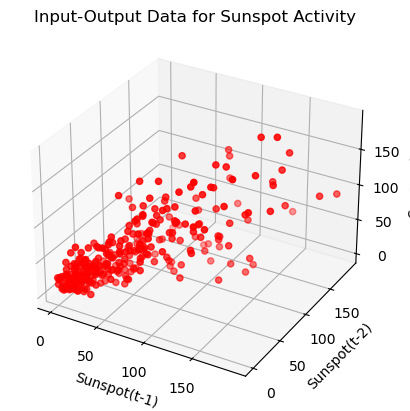

Eror vetor: [ 3.60757219e+00  5.17162684e+00  4.75788203e+00  5.58133035e+00
  5.70528844e+00 -7.48140765e+00 -1.42923453e+01 -1.66480451e+01
 -4.25889434e+00  4.47573856e+00 -9.61550627e+00 -1.06281716e+01
 -1.73422164e+00  6.79074380e+00 -1.10951919e+01 -9.17933522e+00
 -2.37780266e+01 -3.27987161e+01  1.79650285e+01  1.41782208e+00
 -4.73080970e+00 -4.70893314e+00  1.27248538e+01 -5.11484355e-01
 -4.96029484e+00  2.02242359e+00 -7.58873256e+00  1.20946068e+01
 -2.66694082e+01  3.27832071e+00  8.15602653e+00  1.31146164e+00
 -3.18606700e+00 -5.33815245e+00  1.39507400e+01  6.59648547e+00
  7.26351695e+00  8.94533274e+00  1.55765812e+00 -9.14838666e+00
 -3.36916516e+00  1.89896869e+01 -2.50934646e+01  4.21391465e+00
  9.73663398e+00 -6.34949648e+00  7.67757751e+00 -9.04138269e+00
  3.36852871e+00  1.13795346e+01 -9.81551890e+00 -2.43811840e+01
  2.12341157e+01 -7.24995812e+00 -1.01210671e+01  6.60036698e+00
  5.10323030e+00 -2.28403747e+01 -1.49671828e+01 -2.36194984e+01
  1.33495877e

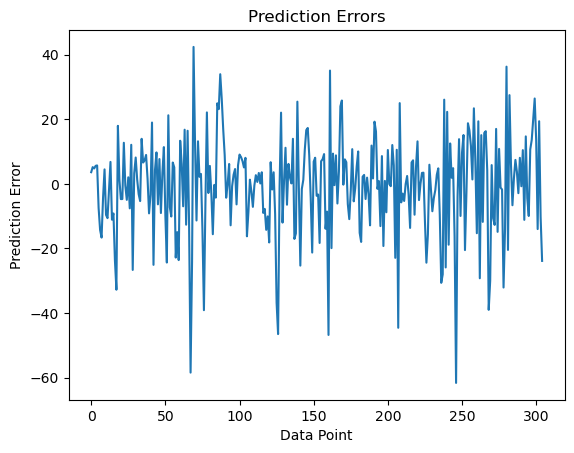

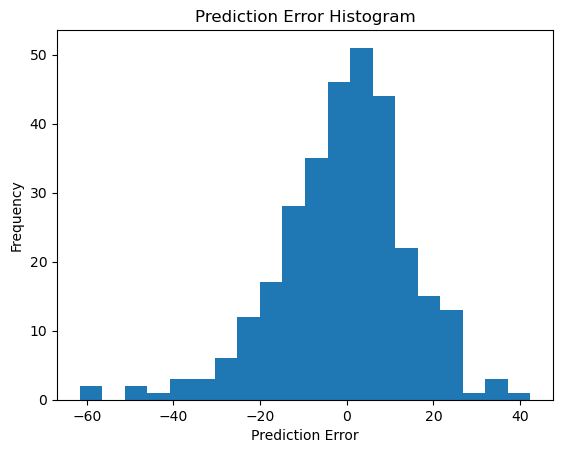

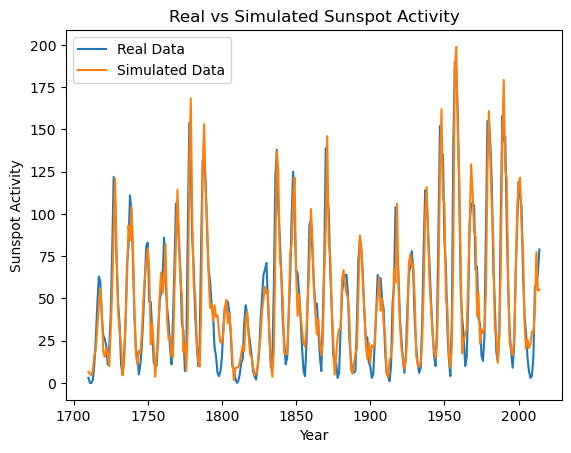

Optimal Coefficients:
w1: 0.011274617041668392
w2: 0.11401852375969049
b: 0.04736377666004112


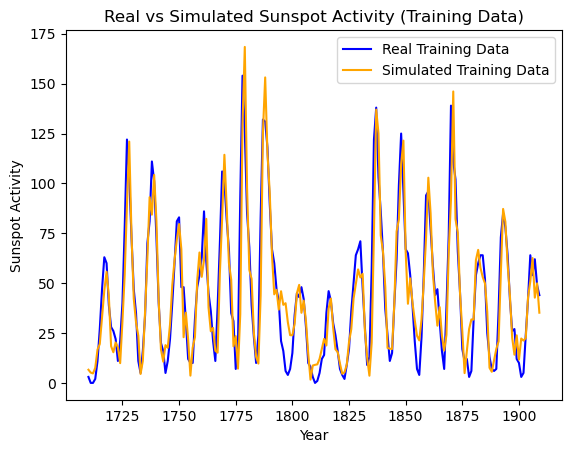

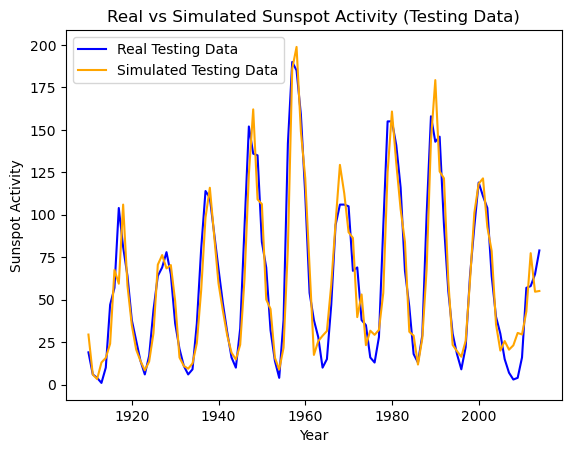

Mean Squared Error (MSE) for Training Data: 229.7557807878088
Mean Squared Error (MSE) for Testing Data: 277.68762106719294
Median Absolute Deviation (MAD) for Training Data: 8.911046595671174
Median Absolute Deviation (MAD) for Testing Data: 10.650906626470459


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define calculate_optimal_weights function
def calculate_optimal_weights(P, T):
    """
    Calculate the optimal weights for an autoregressive model using linear regression.

    Args:
    - P (numpy.ndarray): Input matrix with shape (num_samples, num_features).
    - T (numpy.ndarray): Output matrix with shape (num_samples, 1).

    Returns:
    - numpy.ndarray: Optimal weights for the autoregressive model.
    """

    # Add bias term to the input matrix
    P_with_bias = np.hstack((P, np.ones((P.shape[0], 1))))

    # Calculate optimal weights using linear regression formula
    weights = np.linalg.inv(P_with_bias.T @ P_with_bias) @ P_with_bias.T @ T

    # Extract weights excluding the bias term
    optimal_weights = weights[:-1]

    return optimal_weights


# Load data
data = np.loadtxt('sunspot.txt')

# Data Visualization
years = data[:, 0]
sunspots = data[:, 1]
plt.plot(years, sunspots)
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Sunspot Activity Over the Years')
plt.show()

# Prepare Data for Neural Network
window_size = 10

X_train = []
y_train = []
for i in range(len(sunspots) - window_size):
    X_train.append(sunspots[i:i+window_size])
    y_train.append(sunspots[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Extract the first 200 data points for training
Pu = X_train[:200]
Tu = y_train[:200]

# Calculate optimal weight coefficients for the training dataset
optimal_weights = calculate_optimal_weights(Pu, Tu)

# Build the Neural Network
class NeuralNetwork:
    def __init__(self):
        # Initialize weights and bias
        self.weights = np.random.randn(window_size) * 0.01
        self.bias = 0.0
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the Neural Network
network = NeuralNetwork()
learning_rate = 0.00005
epochs = 1000
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = network.forward(X_train)
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)
    
    # Backpropagation (Gradient Descent)
    grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    grad_bias = np.mean(y_pred - y_train)
    
    # Update weights and bias
    network.weights -= learning_rate * grad_weights
    network.bias -= learning_rate * grad_bias

# Plotting the MSE for each epoch
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Epoch')
plt.ylim(0, 1000)
plt.show()
    #print(f'Epoch {epoch}:')
   #print('Weights:', network.weights)
    #print('Bias:', network.bias)


# Visualization and Analysis
# Plot 3D graph (input-output data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.set_xlabel('Sunspot(t-1)')
ax.set_ylabel('Sunspot(t-2)')
ax.set_zlabel('Sunspot(t)')
plt.title('Input-Output Data for Sunspot Activity')
plt.show()

# Step 8: Verify Model with Training Data
y_train_pred = network.forward(X_train)

# Step 9: Verify Model with Testing Data
# Assuming we have some testing data X_test and y_test

# Prediction Errors
e_train = y_train_pred - y_train
print("Eror vetor:", e_train)
# Plot Prediction Errors
plt.plot(e_train)
plt.xlabel('Data Point')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.show()

# Error Histogram
plt.hist(e_train, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Histogram')
plt.show()


plt.plot(years[window_size:], y_train, label='Real Data')
plt.plot(years[window_size:], y_train_pred, label='Simulated Data')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity')
plt.legend()
plt.show()

print("Optimal Coefficients:")
print("w1:", optimal_weights[0])
print("w2:", optimal_weights[1])
print("b:", network.bias)

# Verify Model with Training Data
Tsu_train = network.forward(Pu)

# Plot Training Data Verification
plt.plot(years[window_size:200+window_size], Tu, label='Real Training Data', color='blue')
plt.plot(years[window_size:200+window_size], Tsu_train, label='Simulated Training Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Training Data)')
plt.legend()
plt.show()

# Verify Model with Testing Data
X_test = []
y_test = []
for i in range(200, len(sunspots) - window_size):
    X_test.append(sunspots[i:i+window_size])
    y_test.append(sunspots[i+window_size])

X_test = np.array(X_test)
y_test = np.array(y_test)

Tsu_test = network.forward(X_test)

# Plot Testing Data Verification
plt.plot(years[200+window_size:], y_test, label='Real Testing Data', color='blue')
plt.plot(years[200+window_size:], Tsu_test, label='Simulated Testing Data', color='orange')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Testing Data)')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE) for Training Data
mse_train = np.mean(e_train ** 2)
print("Mean Squared Error (MSE) for Training Data:", mse_train)

# Calculate Mean Squared Error (MSE) for Testing Data
e_test = y_test - Tsu_test
mse_test = np.mean(e_test ** 2)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

# Calculate Median Absolute Deviation (MAD) for Training Data
MAD_train = np.median(np.abs(e_train))

# Calculate Median Absolute Deviation (MAD) for Testing Data
MAD_test = np.median(np.abs(e_test))

print("Median Absolute Deviation (MAD) for Training Data:", MAD_train)
print("Median Absolute Deviation (MAD) for Testing Data:", MAD_test)



#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# 14. ////////////////////////////////

In [6]:
import os
import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set TensorFlow to use only the CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Load the data
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())  # Correctly using inplace modification

# Prepare the data
features = ['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
numeric_features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Platform', 'Genre']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X = data[features]
y = (data['Global_Sales'] > 1).astype(int)  # Example binary target

X_transformed = preprocessor.fit_transform(X)

# K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies = []

for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert sparse matrix to dense, if necessary
    X_train = X_train.toarray() if sp.issparse(X_train) else X_train
    X_test = X_test.toarray() if sp.issparse(X_test) else X_test

    # Build the model
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation='selu', input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Calculate the average and standard deviation of the accuracies
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.2%}")

2024-04-29 14:34:36.858156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 14:34:36.858225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 14:34:36.908783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 14:34:37.027527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 14:34:40.105568: E exter

Epoch 1/10
1478/1478 [==============================] - 2s 901us/step - loss: 0.0700 - accuracy: 0.9777
Epoch 2/10
1478/1478 [==============================] - 1s 894us/step - loss: 0.0165 - accuracy: 0.9959
Epoch 3/10
1478/1478 [==============================] - 1s 897us/step - loss: 0.0115 - accuracy: 0.9970
Epoch 4/10
1478/1478 [==============================] - 1s 943us/step - loss: 0.0087 - accuracy: 0.9980
Epoch 5/10
1478/1478 [==============================] - 1s 896us/step - loss: 0.0073 - accuracy: 0.9977
Epoch 6/10
1478/1478 [==============================] - 1s 875us/step - loss: 0.0065 - accuracy: 0.9982
Epoch 7/10
1478/1478 [==============================] - 1s 871us/step - loss: 0.0060 - accuracy: 0.9980
Epoch 8/10
1478/1478 [==============================] - 1s 899us/step - loss: 0.0053 - accuracy: 0.9982
Epoch 9/10
1478/1478 [==============================] - 1s 898us/step - loss: 0.0052 - accuracy: 0.9982
Epoch 10/10
1478/1478 [==============================] - 1s 885u